In [96]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from conn_dict import conn_dict
import psycopg2
from sqlalchemy import create_engine, inspect
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [97]:
# create variables from conn_dict
locals().update(conn_dict)


In [98]:
# create the connection to the database 
engine = create_engine(f'postgresql://{username}:{db_pass}@{hostname}:{port_id}/{db}')




In [99]:
# look at the tables in the database
inspector = inspect(engine)
inspector.get_table_names()


['Additional_Health_Measures_2',
 'Health_Measures_3_State',
 'Additional_Health_Measures_4_State',
 'health_measures',
 'additional_health_measures',
 'all_health_measures_final',
 'Health_Measures_1']

In [100]:
health_measures_df = pd.read_sql('SELECT * FROM public."all_health_measures_final"', engine)
health_measures_df.head()

,State,County,State_County,Premature_death,Percentage_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percentage_Low_birthweight,Percentage_Smokers,Percentage_Adults_with_Obesity,...,Suicides,Firearm_fatalities,Juvenile_Arrest_Rate,Traffic_Volume,Homeowners,Severe_housing_cost_burden,percentage_Broadband_Access,Population,percentage_female,rural_residents
0,Alabama,Autauga,Alabama_Autauga,836,20,4.5,5.4,10,20,35,...,52,49,8,155,16088,2862,83,56145,51.5,22921
1,Alabama,Baldwin,Alabama_Baldwin,3377,17,4.2,5.2,8,20,30,...,214,153,26,134,64716,9296,85,229287,51.6,77060
2,Alabama,Barbour,Alabama_Barbour,539,31,5.9,6.1,12,28,40,...,20,32,24,102,5775,1055,65,24589,47.2,18613
3,Alabama,Bibb,Alabama_Bibb,460,25,5.2,5.8,10,25,41,...,18,20,24.62576375,27,5428,650,76,22136,46.8,15663
4,Alabama,Blount,Alabama_Blount,1143,23,4.9,5.7,8,22,39,...,61,59,6,43,16132,1722,80,57879,50.6,51562


In [101]:
# investigate df
shape = health_measures_df.shape
info = health_measures_df.info()
print(f'The df has {shape[0]} rows and {shape[1]} columns, {info}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 73 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   State                                                            3142 non-null   object
 1   County                                                           3142 non-null   object
 2   State_County                                                     3142 non-null   object
 3   Premature_death                                                  3142 non-null   object
 4   Percentage_Fair_or_Poor_Health                                   3142 non-null   object
 5   Average_Number_of_Physically_Unhealthy_Days                      3142 non-null   object
 6   Average_Number_of_Mentally_Unhealthy_Days                        3142 non-null   object
 7   Percentage_Low_birthweight                         

In [102]:
# Remove String columns
health_measures_df.drop(['State', 'County', 'State_County'], axis=1, inplace=True)

In [103]:
# convert the columns of the dataframe to numeric datatype
health_measures_df = health_measures_df.apply(pd.to_numeric)
health_measures_df.head()

,Premature_death,Percentage_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percentage_Low_birthweight,Percentage_Smokers,Percentage_Adults_with_Obesity,Food_Environment_Index,Percentage_Physically_Inactive,Percentage_With_Access_to_Exercise_Opportunities,...,Suicides,Firearm_fatalities,Juvenile_Arrest_Rate,Traffic_Volume,Homeowners,Severe_housing_cost_burden,percentage_Broadband_Access,Population,percentage_female,rural_residents
0,836.0,20,4.5,5.4,10.0,20,35,6.5,32,63.0,...,52.0,49.0,8.000000,155,16088,2862.0,83,56145,51.5,22921.0
1,3377.0,17,4.2,5.2,8.0,20,30,7.4,28,75.0,...,214.0,153.0,26.000000,134,64716,9296.0,85,229287,51.6,77060.0
2,539.0,31,5.9,6.1,12.0,28,40,5.7,42,50.0,...,20.0,32.0,24.000000,102,5775,1055.0,65,24589,47.2,18613.0
3,460.0,25,5.2,5.8,10.0,25,41,7.6,38,11.0,...,18.0,20.0,24.625764,27,5428,650.0,76,22136,46.8,15663.0
4,1143.0,23,4.9,5.7,8.0,22,39,7.8,33,23.0,...,61.0,59.0,6.000000,43,16132,1722.0,80,57879,50.6,51562.0


In [104]:
# check datatypes again
types = list(health_measures_df.dtypes)
types

[dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),


In [105]:
# drop outliers for life expectancy
health_measures_df = health_measures_df.loc[health_measures_df['Life_expectancy']<100]
health_measures_df.shape

(3140, 70)

In [106]:
# create df from features selected in feature selection notebook
features = ['Percentage_Fair_or_Poor_Health',
 'Average_Number_of_Physically_Unhealthy_Days',
 'Percentage_Low_birthweight',
 'Percentage_Smokers',
 'Percentage_Adults_with_Obesity',
 'Food_Environment_Index',
 'Teen_Birth_Rate',
 'Percentage_Drive_Alone_to_Work',
 'percentage_Adults_with_Diabetes',
 'percentage_Insufficient_Sleep',
 'Average_Grade_Performance_Math_scores',
 'Segregation_index_School_segregation',
 'Gender_pay_gap',
 'Homicide_Rate',
 'percentage_female']
life_df = health_measures_df[features]


In [107]:
# define features and target, split into training/testing data, scale features
X = life_df.copy()
y = health_measures_df['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [108]:
# instantiate the model, fit, and make training and testing predictions
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
train_predictions = lm.predict(X_train_scaled)
test_predictions = lm.predict(X_test_scaled)

C:\Users\Michael\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

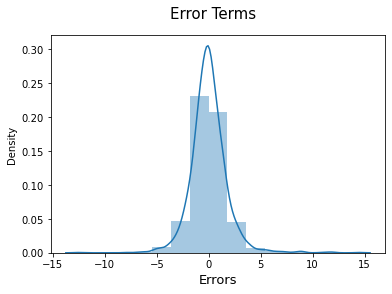

In [109]:
# residual analyis
fig = plt.figure()
sns.distplot((y_train - train_predictions), bins=15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize=13)

In [110]:
# print the r2 score for train and test sets, mean absolute error for the model, coefficients, and the intercept
r2_train = round(r2_score(y_true=y_train, y_pred = train_predictions), 3)
r2_test = round(r2_score(y_true= y_test, y_pred =test_predictions), 3)
coefficients = lm.coef_
intercept = round(lm.intercept_, 3)
mae = round(mean_absolute_error(y_test, test_predictions),3)
print(f'Training r2: {r2_train}, Test r2:{r2_test}, mean absolute error: {mae}, intercept:{intercept} and the coefficients:{coefficients}')

Training r2: 0.686, Test r2:0.675, mean absolute error: 1.205, intercept:76.888 and the coefficients:[ 0.85231623 -0.51968618 -0.185859   -0.93042507 -0.35290809  0.20095038
 -0.96832769 -0.30465849 -0.3981179  -0.18221355  0.07314367 -0.10295322
  0.02075078 -0.26057703 -0.38183926]
